##### Please upvote if you like the work!!!

##### Cells with requirement of high computational power (kfold cv) have been commented but the results have been displayed in the following cells.

# Permanent Magnet Synchronous Motor

![alt text](https://alliedmarketresearch.files.wordpress.com/2017/02/permanent-magnet-synchronous-motor-pmsm.png?w=705)

The permanent-magnet synchronous machine (PMSM) drive is one of best choices for a full range of motion control applications. For example, the PMSM is widely used in robotics, machine tools, actuators, and it is being considered in high-power applications such as industrial drives and vehicular propulsion. It is also used for residential/commercial applications. The PMSM is known for having low torque ripple, superior dynamic performance, high efficiency and high power density.

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('pmsm_temperature_data.csv')

In [3]:
df_test = df[(df['profile_id'] == 65) | (df['profile_id'] == 72)]
df = df[(df['profile_id'] != 65) & (df['profile_id'] != 72)]

In [4]:
df

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding,profile_id
0,-0.752143,-1.118446,0.327935,-1.297858,-1.222428,-0.250182,1.029572,-0.245860,-2.522071,-1.831422,-2.066143,-2.018033,4
1,-0.771263,-1.117021,0.329665,-1.297686,-1.222429,-0.249133,1.029509,-0.245832,-2.522418,-1.830969,-2.064859,-2.017631,4
2,-0.782892,-1.116681,0.332771,-1.301822,-1.222428,-0.249431,1.029448,-0.245818,-2.522673,-1.830400,-2.064073,-2.017343,4
3,-0.780935,-1.116764,0.333700,-1.301852,-1.222430,-0.248636,1.032845,-0.246955,-2.521639,-1.830333,-2.063137,-2.017632,4
4,-0.774043,-1.116775,0.335206,-1.303118,-1.222429,-0.248701,1.031807,-0.246610,-2.521900,-1.830498,-2.062795,-2.018145,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
982765,-0.090443,1.933639,0.298720,-1.292812,-1.222431,-0.255640,1.029143,-0.245697,-0.275921,1.372986,0.805179,0.377354,81
982766,-0.090435,1.933327,0.300075,-1.292917,-1.222431,-0.255640,1.029146,-0.245738,-0.276161,1.372908,0.805210,0.377742,81
982767,-0.090084,1.932968,0.298321,-1.292400,-1.222430,-0.255640,1.029144,-0.245710,-0.275856,1.374455,0.805298,0.377129,81
982768,-0.089465,1.932494,0.299994,-1.292567,-1.222430,-0.255640,1.029155,-0.245718,-0.275550,1.375038,0.805228,0.376580,81


In [5]:
df.describe()

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding,profile_id
count,942677.000000,942677.000000,942677.000000,942677.000000,942677.000000,942677.000000,942677.000000,942677.000000,942677.000000,942677.000000,942677.000000,942677.000000,942677.000000
mean,-0.030010,-0.008238,-0.021835,0.007720,0.003210,0.020170,-0.002465,0.019958,-0.005093,-0.004537,-0.002131,-0.000204,49.779981
std,1.007729,1.009503,0.994308,0.996054,0.996456,0.999063,1.000106,0.999683,1.001414,1.004053,0.999985,0.998672,22.337115
min,-8.573954,-1.429349,-1.655373,-1.861463,-1.371529,-3.345953,-3.245874,-3.341639,-2.631991,-1.834688,-2.066143,-2.019973,4.000000
25%,-0.634542,-1.041886,-0.854390,-0.881885,-0.951878,-0.265042,-0.760764,-0.254672,-0.667836,-0.747183,-0.761951,-0.705774,31.000000
50%,0.242495,-0.185147,0.225416,-0.089520,-0.140245,-0.121022,0.196713,-0.091449,0.099152,-0.056538,0.009582,0.009203,55.000000
75%,0.681905,0.698607,0.356361,0.859836,0.855827,0.561778,1.013952,0.543750,0.677849,0.688808,0.770775,0.724097,68.000000
max,2.967117,2.649032,2.274734,1.793498,2.024164,3.016971,1.060937,2.914185,2.917456,2.449158,2.326668,2.653781,81.000000


In [6]:
df.isnull().sum()

ambient           0
coolant           0
u_d               0
u_q               0
motor_speed       0
torque            0
i_d               0
i_q               0
pm                0
stator_yoke       0
stator_tooth      0
stator_winding    0
profile_id        0
dtype: int64

There are no missing values in the dataset.

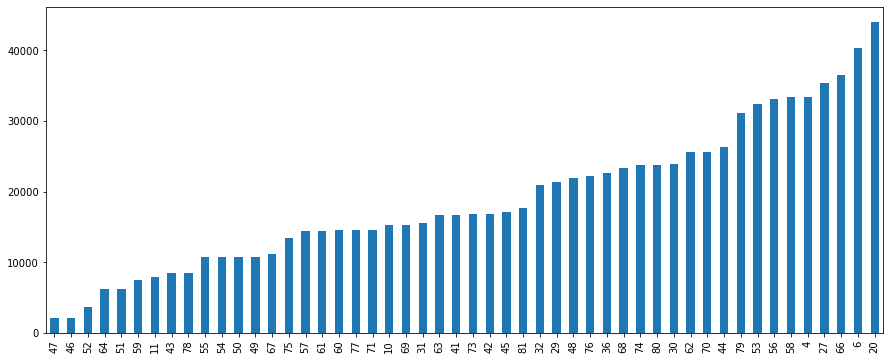

In [7]:
plt.figure(figsize=(15,6))
df['profile_id'].value_counts().sort_values().plot(kind = 'bar')

As we can see, session ids 66, 6 and 20 have the most number of measurements recorded.

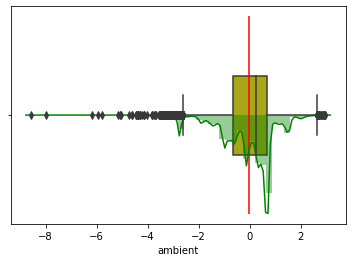

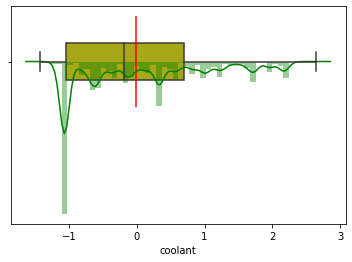

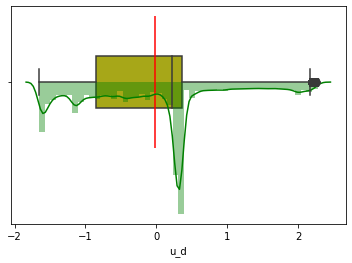

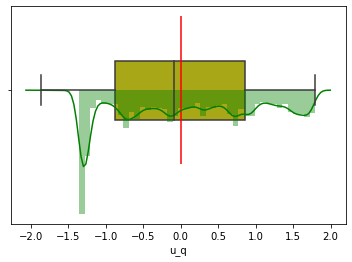

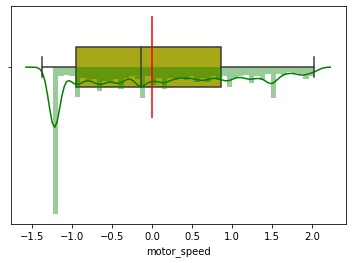

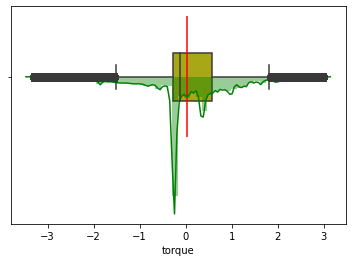

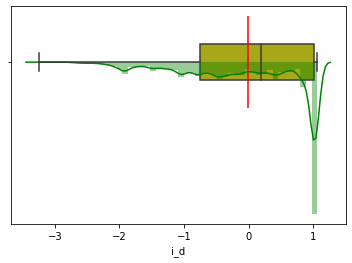

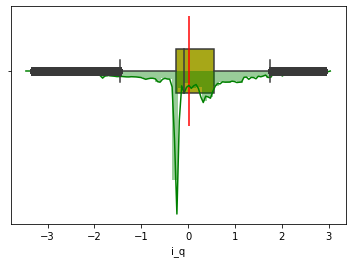

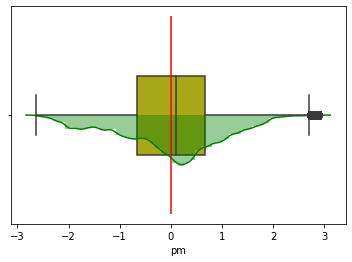

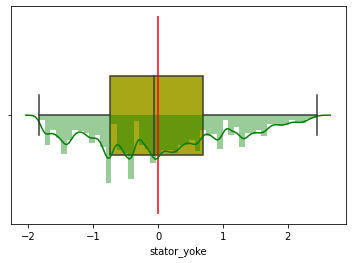

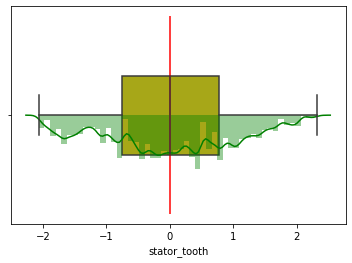

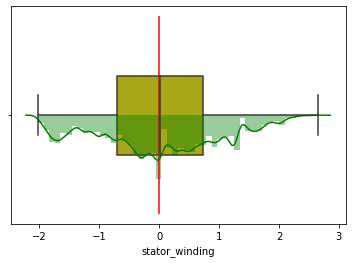

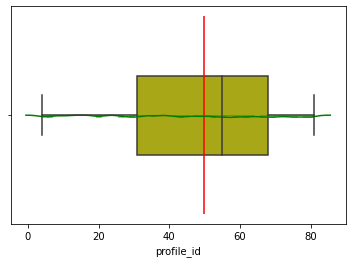

In [8]:
for i in df.columns:
    sns.distplot(df[i],color='g')
    sns.boxplot(df[i],color = 'y')
    plt.vlines(df[i].mean(),ymin = -1,ymax = 1,color = 'r')
    plt.show()

As we can see from the the above plots, the mean and median for most of the plots are very close to each other. So the data seems to have low skewness for almost all variables.

### Checking skewness and kurtosis numerically

In [9]:
import scipy.stats as stats
for i in df.columns:
    print(i,' :\nSkew : ',df[i].skew(),' : \nKurtosis : ',df[i].kurt())
    print()

ambient  :
Skew :  -0.8071873478865997  : 
Kurtosis :  0.6969970305203854

coolant  :
Skew :  0.6405765703677487  : 
Kurtosis :  -0.762280458904407

u_d  :
Skew :  0.21732958406019895  : 
Kurtosis :  -0.5172885804724348

u_q  :
Skew :  0.18514589739802864  : 
Kurtosis :  -1.2623624326900413

motor_speed  :
Skew :  0.3326222639822973  : 
Kurtosis :  -1.152694198978819

torque  :
Skew :  -0.053666005918621015  : 
Kurtosis :  0.777461848244013

i_d  :
Skew :  -0.6198973941589144  : 
Kurtosis :  -0.7509222702006975

i_q  :
Skew :  -0.08850143002199985  : 
Kurtosis :  0.7775825670933418

pm  :
Skew :  -0.24570361489011244  : 
Kurtosis :  -0.33467680472022776

stator_yoke  :
Skew :  0.25188191404697025  : 
Kurtosis :  -0.7134785655139653

stator_tooth  :
Skew :  -0.08028656543420369  : 
Kurtosis :  -0.7536349828238866

stator_winding  :
Skew :  -0.04548823290271412  : 
Kurtosis :  -0.7012550470798771

profile_id  :
Skew :  -0.5391816798110003  : 
Kurtosis :  -0.7533926942030775



As it is not highly skewed data and looking at the values of the dataset it seems there already has been some normalization done.

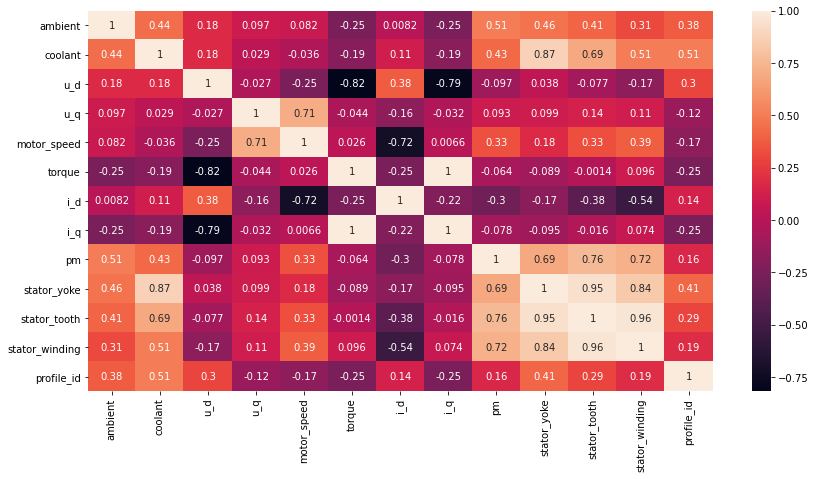

In [10]:
plt.figure(figsize=(14,7))
sns.heatmap(df.corr(),annot=True)

From the heatmap above, we can see that torque and q component of current are almost perfectly correlated. Also there seems to be a very high correlation between temperature measurements of stator yoke, stator tooth and stator windings.

For a random measurement, we can try to compare the temperatures of the 3 stator components.

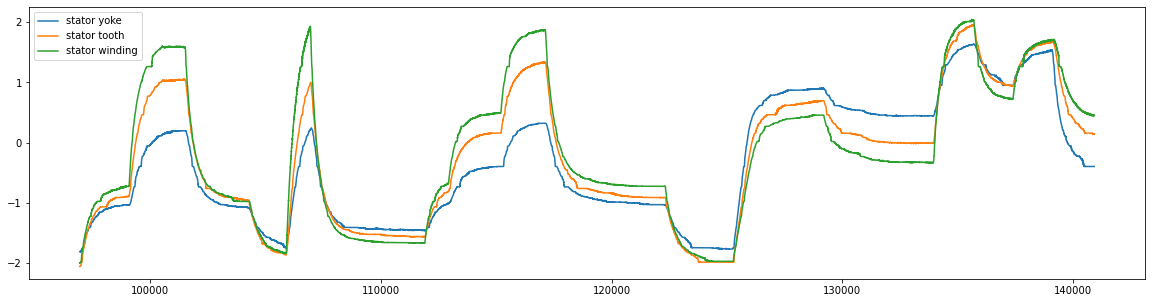

In [11]:
plt.figure(figsize=(20,5))
df[df['profile_id'] == 20]['stator_yoke'].plot(label = 'stator yoke')
df[df['profile_id'] == 20]['stator_tooth'].plot(label = 'stator tooth')
df[df['profile_id'] == 20]['stator_winding'].plot(label = 'stator winding')
plt.legend()

As we can see from the plot, all three stator components follow a similar measurment variance.

As the dataset author mentioned, the records in the same profile id have been sorted by time, we can assume that these recordings have been arranged in series of time.

Due to this we can infer that there has not been much time given for the motor to cool down in between recording the sensor data as we can see that initially the stator yoke temperature is low as compared to temperature of stator winding but as we progress in time, the stator yoke temperature goes above the temperature of stator winding.

As profile_id is an id for each measurement session, we can remove it from any furthur analysis and model building.

In [12]:
df.drop('profile_id',axis = 1,inplace=True)
df_test.drop('profile_id',axis = 1,inplace=True)

# Statistical Analysis of Variables
We'll see which particular variables contribute to the rotor temperature individually by checking their statistical significance.

### Ambient Temperature

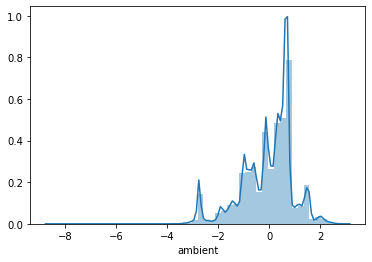

In [13]:
sns.distplot(df['ambient'])

In [14]:
from scipy.stats import shapiro
shapiro(df['ambient'])

ShapiroResult(statistic=0.9440718293190002, pvalue=0.0)

In [15]:
shapiro(df['pm'])

ShapiroResult(statistic=0.9890855550765991, pvalue=0.0)

H0 : variance_ambient = variance_pm

H1 : variance_ambient != variance_pm

In [16]:
from scipy.stats import bartlett
bartlett(df['ambient'],df['pm'])

BartlettResult(statistic=37.25665813656089, pvalue=1.0356081340638338e-09)

pvalue is less than 0.05. So we reject the null hypothesis and can say that variance for ambient temperature is not equal to the variance of rotor temperature.

### Coolant Temperature

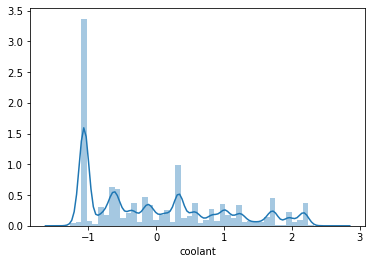

In [17]:
sns.distplot(df['coolant'])

In [18]:
from scipy.stats import shapiro
shapiro(df['coolant'])

ShapiroResult(statistic=0.8946822285652161, pvalue=0.0)

In [19]:
shapiro(df['pm'])

ShapiroResult(statistic=0.9890855550765991, pvalue=0.0)

H0 : variance_coolant = variance_pm

H1 : variance_coolant != variance_pm

In [20]:
from scipy.stats import bartlett
bartlett(df['coolant'],df['pm'])

BartlettResult(statistic=61.01729421073871, pvalue=5.657562879855381e-15)

pvalue is less than 0.05. So we reject the null hypothesis and can say that variance for coolant temperature is not equal to the variance of rotor temperature.

### Voltage d-component

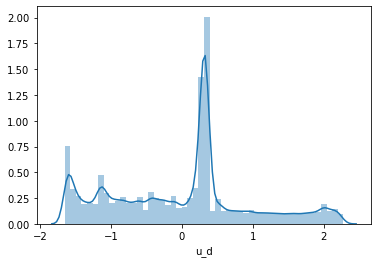

In [21]:
sns.distplot(df['u_d'])

In [22]:
from scipy.stats import shapiro
shapiro(df['u_d'])

ShapiroResult(statistic=0.9543233513832092, pvalue=0.0)

In [23]:
shapiro(df['pm'])

ShapiroResult(statistic=0.9890855550765991, pvalue=0.0)

H0 : variance_u_d = variance_pm

H1 : variance_u_d != variance_pm

In [24]:
from scipy.stats import bartlett
bartlett(df['u_d'],df['pm'])

BartlettResult(statistic=47.80373697690372, pvalue=4.710932327121431e-12)

pvalue is less than 0.05. So we reject the null hypothesis and can say that variance for voltage d-component is not equal to the variance of rotor temperature.

### Voltage q-component

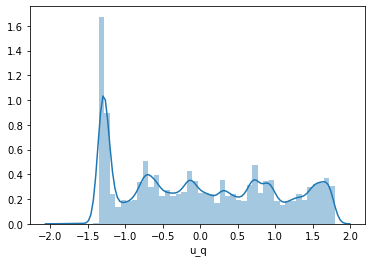

In [25]:
sns.distplot(df['u_q'])

In [26]:
from scipy.stats import shapiro
shapiro(df['u_q'])

ShapiroResult(statistic=0.9276503920555115, pvalue=0.0)

In [27]:
shapiro(df['pm'])

ShapiroResult(statistic=0.9890855550765991, pvalue=0.0)

H0 : variance_u_q = variance_pm

H1 : variance_u_q != variance_pm

In [28]:
from scipy.stats import bartlett
bartlett(df['u_q'],df['pm'])

BartlettResult(statistic=27.15232167072602, pvalue=1.880392472250665e-07)

pvalue is less than 0.05. So we reject the null hypothesis and can say that variance for voltage q-component is not equal to the variance of rotor temperature.

### Motor speed

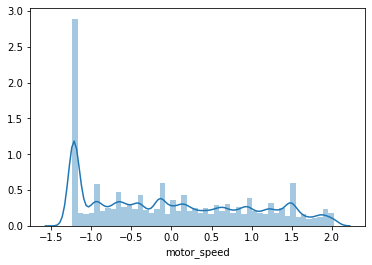

In [29]:
sns.distplot(df['motor_speed'])

In [30]:
from scipy.stats import shapiro
shapiro(df['motor_speed'])

ShapiroResult(statistic=0.9210241436958313, pvalue=0.0)

In [31]:
shapiro(df['pm'])

ShapiroResult(statistic=0.9890855550765991, pvalue=0.0)

H0 : variance_motor_speed = variance_pm

H1 : variance_motor_speed != variance_pm

In [32]:
from scipy.stats import bartlett
bartlett(df['motor_speed'],df['pm'])

BartlettResult(statistic=23.21763581632128, pvalue=1.446645750911655e-06)

pvalue is less than 0.05. So we reject the null hypothesis and can say that variance of motor speed is not equal to the variance of rotor temperature.

### Current d-component

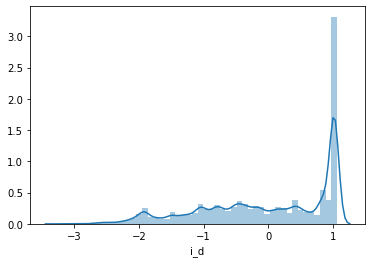

In [33]:
sns.distplot(df['i_d'])

In [34]:
from scipy.stats import shapiro
shapiro(df['i_d'])

ShapiroResult(statistic=0.8836645483970642, pvalue=0.0)

In [35]:
shapiro(df['pm'])

ShapiroResult(statistic=0.9890855550765991, pvalue=0.0)

H0 : variance_i_d = variance_pm

H1 : variance_i_d != variance_pm

In [36]:
from scipy.stats import bartlett
bartlett(df['i_d'],df['pm'])

BartlettResult(statistic=1.6089899795019313, pvalue=0.2046338379791107)

pvalue is higher than 0.05. So we fail to reject the null hypothesis and can say that we do not have enough evidence to reject the null hypothesis. So we do not have enough evidence to prove that variance of d component of current is not equal to the variance of motor temperature.

### Current q-component

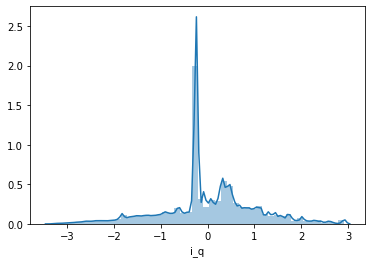

In [37]:
sns.distplot(df['i_q'])

In [38]:
from scipy.stats import shapiro
shapiro(df['i_q'])

ShapiroResult(statistic=0.9700843691825867, pvalue=0.0)

In [39]:
shapiro(df['pm'])

ShapiroResult(statistic=0.9890855550765991, pvalue=0.0)

H0 : variance_i_q = variance_pm

H1 : variance_i_q != variance_pm

In [40]:
from scipy.stats import bartlett
bartlett(df['i_q'],df['pm'])

BartlettResult(statistic=2.8208056168633027, pvalue=0.09304969011621197)

pvalue is higher than 0.05. So we fail to reject the null hypothesis and can say that we do not have enough evidence to reject the null hypothesis. So we do not have enough evidence to prove that variance of q component of current is not equal to the variance of motor temperature.

### Shuffling the data

In [41]:
df = df.sample(frac=1,random_state=3)

In [42]:
df.head()

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding
905495,0.270204,0.288879,0.462250,-0.247227,-0.678016,-0.535209,0.968799,-0.573988,-0.466908,0.182942,0.134773,0.080600
980709,-0.123966,1.937632,0.299465,-1.293001,-1.222430,-0.255640,1.029135,-0.245726,-0.637503,1.329132,0.770201,0.321009
740606,0.688609,-0.171957,1.522243,1.061857,1.528602,-0.876003,-0.845077,-0.820782,0.157866,-0.065629,-0.014255,0.015097
225890,-1.158055,-1.042933,-0.469943,1.475568,1.834745,-0.004009,-0.777329,-0.018343,0.303484,-0.740729,-0.414880,-0.266328
940496,0.688188,1.747456,0.947134,0.657506,-0.151493,-0.823026,0.873817,-0.907738,0.736868,1.417517,0.999193,0.515266


The data description did not provide us with any information on the units of measure. So its difficult to interpret the values measured.

# EDA

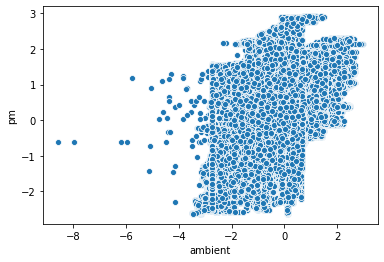

In [43]:
sns.scatterplot(df['ambient'],df['pm'])

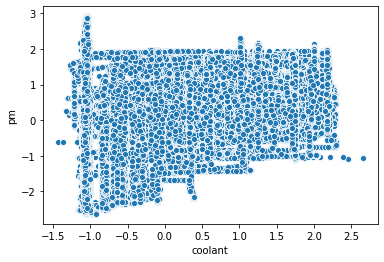

In [44]:
sns.scatterplot(df['coolant'],df['pm'])

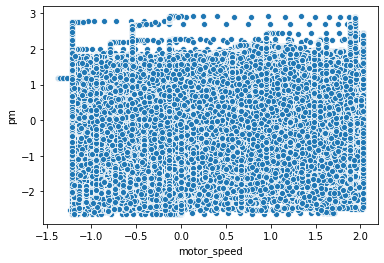

In [45]:
sns.scatterplot(df['motor_speed'],df['pm'])

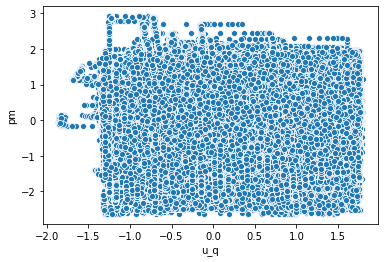

In [46]:
sns.scatterplot(df['u_q'],df['pm'])

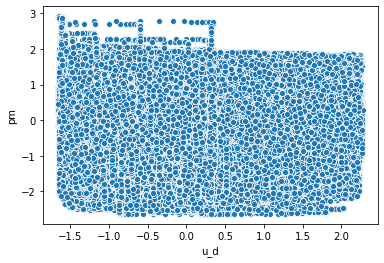

In [47]:
sns.scatterplot(df['u_d'],df['pm'])

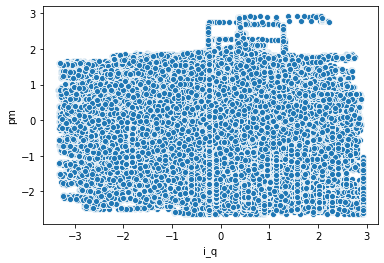

In [48]:
sns.scatterplot(df['i_q'],df['pm'])

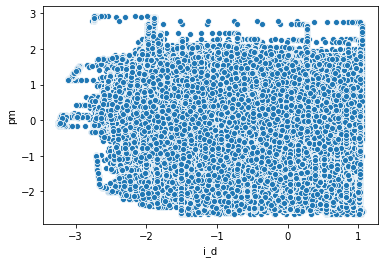

In [49]:
sns.scatterplot(df['i_d'],df['pm'])

## Basic multivariate regression (Base Model)

As we want to predict the temperatures of stator components and rotor(pm), we will drop these values from our dataset for regression. Also, torque is a quantity, which is not reliably measurable in field applications, so this feature shall be omitted in this modelling.

In [50]:
from sklearn.preprocessing import MinMaxScaler
X = df.drop(['pm','stator_yoke','stator_tooth','stator_winding','torque'],axis = 1)
X_df_test = df_test.drop(['pm','stator_yoke','stator_tooth','stator_winding','torque'],axis = 1)
mm = MinMaxScaler()
X = mm.fit_transform(X)
X_df_test = mm.fit_transform(X_df_test)
y = df['pm']
y_df_test = df_test['pm']
X = pd.DataFrame(X,columns = ['ambient', 'coolant', 'u_d', 'u_q', 'motor_speed', 'i_d','i_q'])
X_df_test = pd.DataFrame(X_df_test,columns = ['ambient', 'coolant', 'u_d', 'u_q', 'motor_speed', 'i_d','i_q'])
y.reset_index(drop = True,inplace = True)
y_df_test.reset_index(drop = True,inplace = True)

In [51]:
print(X.shape)
print(y.shape)

(942677, 7)
(942677,)


-0.8071873478865943


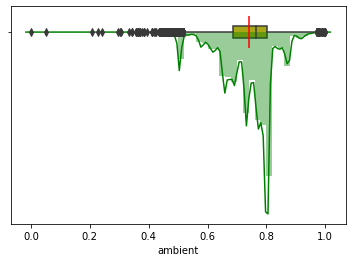

0.6405765703677463


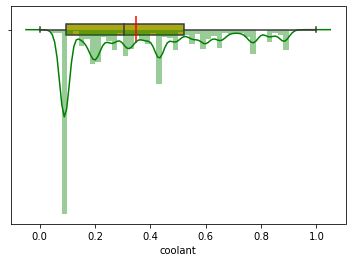

0.21732958406019925


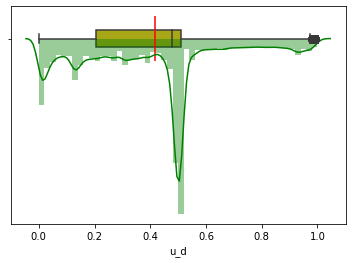

0.18514589739802914


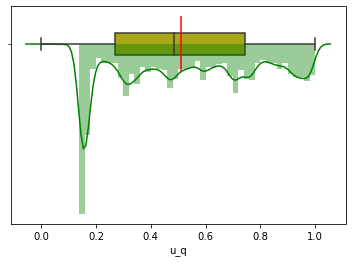

0.3326222639822957


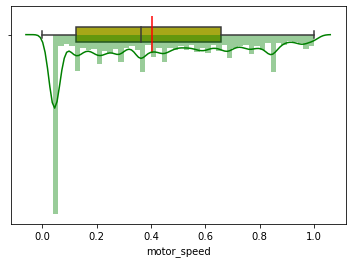

-0.6198973941589128


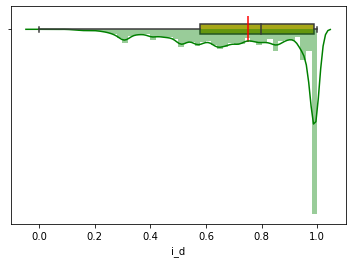

-0.0885014300220004


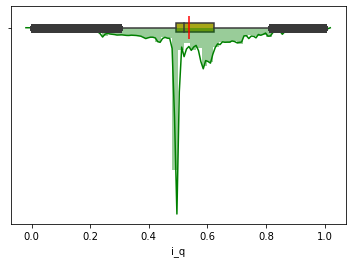

In [52]:
for i in X.columns:
    print(X[i].skew())
    sns.distplot(X[i],color='g')
    sns.boxplot(X[i],color = 'y')
    plt.vlines(X[i].mean(),ymin = -1,ymax = 1,color = 'r')
    plt.show()

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [54]:
import statsmodels.api as sm
X_train_const = sm.add_constant(X_train)
lin_reg = sm.OLS(y_train,X_train_const).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     pm   R-squared:                       0.478
Model:                            OLS   Adj. R-squared:                  0.478
Method:                 Least Squares   F-statistic:                 8.649e+04
Date:                Mon, 31 Aug 2020   Prob (F-statistic):               0.00
Time:                        15:46:43   Log-Likelihood:            -7.2223e+05
No. Observations:              659873   AIC:                         1.444e+06
Df Residuals:                  659865   BIC:                         1.445e+06
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -3.6547      0.016   -232.241      0.000      -3.686      -3.624
ambient         4.3159      0.012    369.744      0.000       4.293       4.339
coolant         1.2277      0.004    302.719      0.000       1.220       1.236
u_d            -0.5572      0.007    -82.398      0.000      -0.570      -0.544
u_q            -1.3252      0.007   -185.924      0.000      -1.339      -1.311
motor_speed     2.0072      0.010    203.941      0.000       1.988       2.027
i_d             0.3261      0.009     38.329      0.000       0.309       0.343
i_q            -0.2278      0.011    -21.084      0.000      -0.249      -0.207
==============================================================================
Omnibus:                    10422.005   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17968.031
Skew:                           0.125   Prob(JB):                         0.00
Kurtosis:                       3.769   Cond. No.                         43.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
from statsmodels.stats.diagnostic import linear_rainbow
linear_rainbow(lin_reg)

(1.000229519089537, 0.47372475242814827)

In [56]:
from statsmodels.stats.api import het_goldfeldquandt
het_goldfeldquandt(lin_reg.resid,lin_reg.model.exog)

(1.0053542080215174, 0.06256299707846051, 'increasing')

In [57]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X_train_const.values,i) for i in range(X_train_const.shape[1])]
pd.DataFrame(vif,index=X_train_const.columns)

,0
const,312.677729
ambient,1.312388
coolant,1.272767
u_d,3.695344
u_q,4.764255
motor_speed,10.529677
i_d,4.925479
i_q,3.763724


##### Observations :
1. Looking at the pvalues of the each feature, all the them seems to be significant is predicting the stator winding temperature as pvalues are very low.
2. The Durbin watson test score also is very close to 2, so we can say there seems to be very low autocorrelation in the dataset.
3. The pvalue for Jarque-Bera test is less that 0.05, so we reject the null hypothesis that the residuals are normally distributed. We will also check for distribution of residuals as well as QQ-plot to check visually.
4. The pvalue for rainbow test is greater than 0.05, so we fail to reject the null hypothesis and can say that the data follows linearity.
5. The pvalue for Goldfeld Quantile distribution test is greater than 0.05, so we fail to reject the null hypothesis and can say that the data is homoskedastic in nature.
6. But we can also see that there are high vif value for motor_speed. So we can say that there seems to be some multicollinearity in our model.

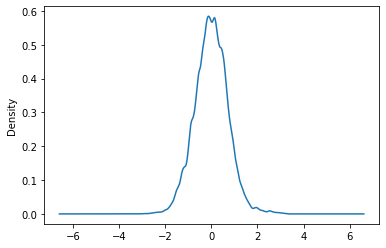

In [58]:
lin_reg.resid.plot(kind = 'density')

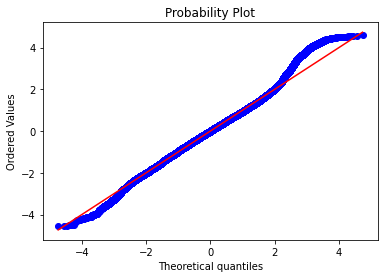

In [59]:
import scipy.stats as stats
import pylab
st_residual = lin_reg.get_influence().resid_studentized_internal
stats.probplot(st_residual, dist="norm", plot = pylab)
plt.show()

As we can see the from the QQ plot as well as kde plot that the residuals are quiet well normally distributed around the centre but deviate from normal distribution towards the extremes which might be the factor influencing JB test to fail the normality test.

In [60]:
y_train_pred = lin_reg.predict(X_train_const)
train_rmse = np.sqrt(np.sum(((y_train-y_train_pred)**2))/len(y_train))
train_rmse

0.7229309883699035

In [61]:
X_test_const = sm.add_constant(X_test)
y_test_pred = lin_reg.predict(X_test_const)
y_test_pred

865402   -0.583583
940616    0.353473
700513    0.461895
225890   -1.255941
900403    0.048589
            ...   
321345    0.441354
578087    0.106897
277426   -0.279036
682753   -0.305968
600446   -1.156945
Length: 282804, dtype: float64

In [62]:
test_rmse = np.sqrt(np.sum(((y_test-y_test_pred)**2))/len(y_test))
test_rmse

0.7237793256389987

In [63]:
lin_reg.rsquared_adj

0.47847537533629825

### Transforming skewed data and capping outliers

In [64]:
X_trans = X
X_trans['coolant'] = np.power(X_trans['coolant'],1/3)
X_trans['ambient'] = np.power(X_trans['ambient'],3)
X_trans['i_d'] = np.power(X_trans['i_d'],3)

-0.07218780665534259


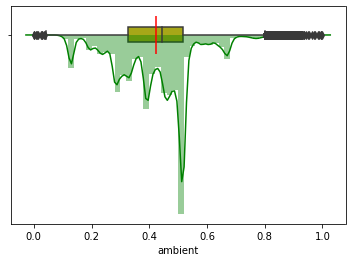

0.1032746603980366


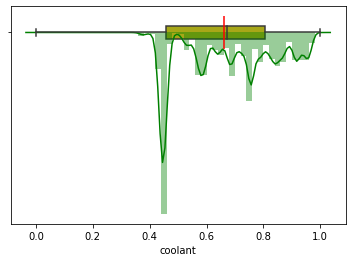

0.21732958406019925


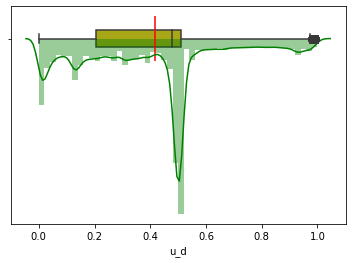

0.18514589739802914


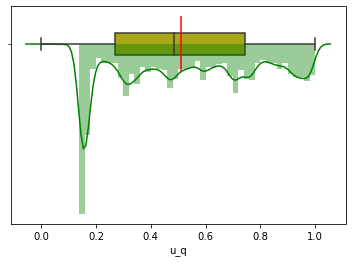

0.3326222639822957


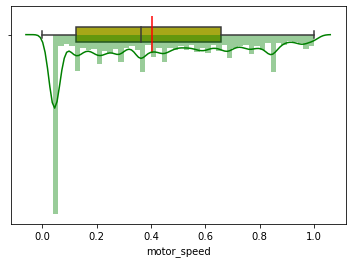

-0.009318263826419718


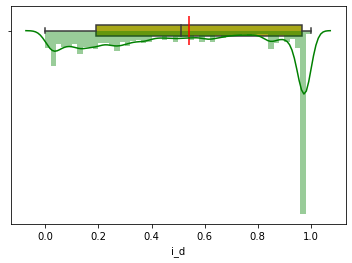

-0.0885014300220004


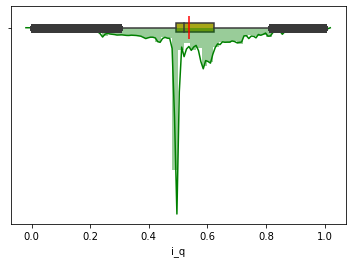

In [65]:
for i in X_trans.columns:
    print(X_trans[i].skew())
    sns.distplot(X_trans[i],color='g')
    sns.boxplot(X_trans[i],color = 'y')
    plt.vlines(X_trans[i].mean(),ymin = -1,ymax = 1,color = 'r')
    plt.show()

In [66]:
z = np.abs(stats.zscore(X_trans))
print(z)

[[0.20762673 0.51341544 0.48685717 ... 0.683649   1.09797685 0.59413496]
 [0.22057768 1.59889176 0.32314023 ... 1.22999873 1.21117811 0.26576922]
 [0.70587791 0.08655755 1.55291887 ... 1.53081823 1.02019161 0.84100721]
 ...
 [0.859705   0.93229161 1.37421605 ... 1.53935941 1.33264134 0.39543258]
 [0.35770209 1.48299315 0.67226475 ... 0.01944192 0.64891071 0.52628773]
 [0.65969739 1.17197025 0.13896211 ... 0.95847642 0.83252945 0.46711069]]


In [67]:
X_trans = X_trans.drop(np.where(z > 3)[0][0:])
X_trans.reset_index(drop=True,inplace = True)
y = y.drop(np.where(z > 3)[0][0:])
y.reset_index(drop = True,inplace = True)

In [68]:
print(X_trans.shape)
print(y.shape)

(937791, 7)
(937791,)


In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_trans, y, test_size=0.3, random_state=3)

In [70]:
import statsmodels.api as sm
X_train_const = sm.add_constant(X_train)
lin_reg = sm.OLS(y_train,X_train_const).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     pm   R-squared:                       0.464
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                 8.111e+04
Date:                Mon, 31 Aug 2020   Prob (F-statistic):               0.00
Time:                        15:47:20   Log-Likelihood:            -7.2774e+05
No. Observations:              656453   AIC:                         1.455e+06
Df Residuals:                  656445   BIC:                         1.456e+06
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -2.1175      0.012   -175.364      0.000      -2.141      -2.094
ambient         2.7262      0.008    340.584      0.000       2.710       2.742
coolant         1.7146      0.006    283.058      0.000       1.703       1.726
u_d            -0.6172      0.007    -87.516      0.000      -0.631      -0.603
u_q            -1.2444      0.006   -210.496      0.000      -1.256      -1.233
motor_speed     1.9506      0.009    223.729      0.000       1.934       1.968
i_d             0.1980      0.005     40.234      0.000       0.188       0.208
i_q            -0.3246      0.011    -28.670      0.000      -0.347      -0.302
==============================================================================
Omnibus:                    11993.608   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20331.685
Skew:                           0.161   Prob(JB):                         0.00
Kurtosis:                       3.800   Cond. No.                         34.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [71]:
y_train_pred = lin_reg.predict(X_train_const)
train_rmse = np.sqrt(np.sum(((y_train-y_train_pred)**2))/len(y_train))
train_rmse

0.7331942220427697

In [72]:
X_test_const = sm.add_constant(X_test)
y_test_pred = lin_reg.predict(X_test_const)
y_test_pred

631873   -0.480749
668672   -0.095105
487845    0.346436
358517    0.251510
9667     -0.156007
            ...   
152305    0.144842
411157   -0.496669
562906   -0.277893
717687    1.110633
531253    0.171393
Length: 281338, dtype: float64

In [73]:
test_rmse = np.sqrt(np.sum(((y_test-y_test_pred)**2))/len(y_test))
test_rmse

0.7321770107191882

There is no imporvement in our rmse by transforming the data. So we will not go ahead with the transformation.

In [74]:
X = X_trans

### Taking care of multicollinearity using PCA

In [75]:
from sklearn.decomposition import PCA
pca  = PCA()
pca.fit(X)

PCA()

In [76]:
pca.explained_variance_ratio_

array([0.52699424, 0.20679644, 0.12631604, 0.07677559, 0.0294215 ,
       0.02490236, 0.00879383])

In [77]:
np.cumsum(pca.explained_variance_ratio_)

array([0.52699424, 0.73379068, 0.86010672, 0.93688231, 0.96630381,
       0.99120617, 1.        ])

As we can see, 96 percent of the variance in data is explained by the first 5 principal components. So we'll choose these 5 components and see if there is any improvement in the Linear model.

In [78]:
pca5 = PCA(n_components=5)
X_pca = pca5.fit_transform(X)
X_pca

array([[-0.45055324, -0.13886389, -0.06892468,  0.06510322, -0.04727002],
       [-0.66990721,  0.04969099,  0.09265965,  0.21736062, -0.03448297],
       [ 0.5284161 , -0.50865001,  0.19969569, -0.09689956,  0.00928703],
       ...,
       [ 0.66652133,  0.235448  ,  0.08184349,  0.14827071, -0.13890535],
       [-0.14087877, -0.34782628, -0.12167951,  0.19299319,  0.03616992],
       [-0.43560514,  0.13500473, -0.04240136, -0.10840627, -0.00753044]])

In [79]:
X_pca_train, X_pca_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=3)

In [80]:
X_pca_train_const = sm.add_constant(X_pca_train)
lin_reg = sm.OLS(y_train,X_pca_train_const).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     pm   R-squared:                       0.451
Model:                            OLS   Adj. R-squared:                  0.451
Method:                 Least Squares   F-statistic:                 1.078e+05
Date:                Mon, 31 Aug 2020   Prob (F-statistic):               0.00
Time:                        15:47:23   Log-Likelihood:            -7.3556e+05
No. Observations:              656453   AIC:                         1.471e+06
Df Residuals:                  656447   BIC:                         1.471e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0092      0.001    -10.070      0.000      -0.011      -0.007
x1             0.6289      0.002    325.801      0.000       0.625       0.633
x2            -0.3037      0.003    -98.442      0.000      -0.310      -0.298
x3             0.8624      0.004    218.473      0.000       0.855       0.870
x4             2.7207      0.005    538.303      0.000       2.711       2.731
x5            -2.3927      0.008   -292.900      0.000      -2.409      -2.377
==============================================================================
Omnibus:                    12784.726   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            23254.927
Skew:                           0.146   Prob(JB):                         0.00
Kurtosis:                       3.875   Cond. No.                         8.92
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [81]:
y_train_pred = lin_reg.predict(X_pca_train_const)
train_rmse = np.sqrt(np.sum(((y_train-y_train_pred)**2))/len(y_train))
train_rmse

0.7419832482949369

In [82]:
X_pca_test_const = sm.add_constant(X_pca_test)
y_test_pred = lin_reg.predict(X_pca_test_const)
y_test_pred

array([-0.35088031, -0.11779467,  0.39807693, ..., -0.12072726,
        1.20347914,  0.10490207])

In [83]:
test_rmse = np.sqrt(np.sum(((y_test-y_test_pred)**2))/len(y_test))
test_rmse

0.7408437722417448

There is no imporvement in our rmse by using PCA. So we will not go ahead with the PCA transformation.

### Dropping the d and q components of current(i) looking at the statistical analysis

In [84]:
X_wo_dqi = X.drop(['i_d','i_q'],axis = 1)

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_wo_dqi, y, test_size=0.3, random_state=3)

In [86]:
import statsmodels.api as sm
X_train_const = sm.add_constant(X_train)
lin_reg = sm.OLS(y_train,X_train_const).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     pm   R-squared:                       0.460
Model:                            OLS   Adj. R-squared:                  0.460
Method:                 Least Squares   F-statistic:                 1.121e+05
Date:                Mon, 31 Aug 2020   Prob (F-statistic):               0.00
Time:                        15:47:24   Log-Likelihood:            -7.2976e+05
No. Observations:              656453   AIC:                         1.460e+06
Df Residuals:                  656447   BIC:                         1.460e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -2.2389      0.004   -533.207      0.000      -2.247      -2.231
ambient         2.7366      0.008    343.622      0.000       2.721       2.752
coolant         1.7263      0.006    284.295      0.000       1.714       1.738
u_d            -0.4201      0.004   -107.350      0.000      -0.428      -0.412
u_q            -1.1698      0.005   -241.676      0.000      -1.179      -1.160
motor_speed     1.7578      0.005    377.090      0.000       1.749       1.767
==============================================================================
Omnibus:                    12534.680   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20744.219
Skew:                           0.178   Prob(JB):                         0.00
Kurtosis:                       3.795   Cond. No.                         14.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [87]:
y_train_pred = lin_reg.predict(X_train_const)
train_rmse = np.sqrt(np.sum(((y_train-y_train_pred)**2))/len(y_train))
train_rmse

0.7354509179886727

In [88]:
X_test_const = sm.add_constant(X_test)
y_test_pred = lin_reg.predict(X_test_const)
y_test_pred

631873   -0.522522
668672   -0.132628
487845    0.397610
358517    0.213880
9667     -0.195075
            ...   
152305    0.161044
411157   -0.514617
562906   -0.317817
717687    1.080323
531253    0.208668
Length: 281338, dtype: float64

In [89]:
test_rmse = np.sqrt(np.sum(((y_test-y_test_pred)**2))/len(y_test))
test_rmse

0.7345381599301245

There is no imporvement in our rmse by using elimination d and q components of current. So we will not go ahead with the elimination.

### Dropping the motor speed looking at the vif values

In [90]:
X_wo_ms = X.drop(['motor_speed'],axis = 1)

In [91]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_wo_ms, y, test_size=0.3, random_state=3)

In [92]:
import statsmodels.api as sm
X_train_const = sm.add_constant(X_train)
lin_reg = sm.OLS(y_train,X_train_const).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     pm   R-squared:                       0.423
Model:                            OLS   Adj. R-squared:                  0.423
Method:                 Least Squares   F-statistic:                 8.017e+04
Date:                Mon, 31 Aug 2020   Prob (F-statistic):               0.00
Time:                        15:47:25   Log-Likelihood:            -7.5186e+05
No. Observations:              656453   AIC:                         1.504e+06
Df Residuals:                  656446   BIC:                         1.504e+06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2731      0.009    -29.839      0.000      -0.291      -0.255
ambient        2.6651      0.008    321.134      0.000       2.649       2.681
coolant        1.6590      0.006    264.224      0.000       1.647       1.671
u_d           -1.3902      0.006   -217.958      0.000      -1.403      -1.378
u_q           -0.1844      0.004    -50.277      0.000      -0.192      -0.177
i_d           -0.7019      0.003   -238.691      0.000      -0.708      -0.696
i_q           -1.6717      0.010   -168.097      0.000      -1.691      -1.652
==============================================================================
Omnibus:                    13480.937   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            21145.268
Skew:                           0.211   Prob(JB):                         0.00
Kurtosis:                       3.772   Cond. No.                         24.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [93]:
y_train_pred = lin_reg.predict(X_train_const)
train_rmse = np.sqrt(np.sum(((y_train-y_train_pred)**2))/len(y_train))
train_rmse

0.7606342646877258

In [94]:
X_test_const = sm.add_constant(X_test)
y_test_pred = lin_reg.predict(X_test_const)
y_test_pred

631873   -0.545991
668672   -0.163536
487845   -0.150778
358517    0.177382
9667     -0.237617
            ...   
152305    0.231565
411157   -0.484333
562906   -0.341647
717687    0.974441
531253    0.275808
Length: 281338, dtype: float64

In [95]:
test_rmse = np.sqrt(np.sum(((y_test-y_test_pred)**2))/len(y_test))
test_rmse

0.7595700366157889

There is no imporvement in our rmse by using elimination motor speed feature. So we will not go ahead with the elimination.

##### Giving a range estimate rather than giving a point estimate is always a more believable strategy. This can be achieved by using k-fold cross validation.

In [96]:
y = pd.DataFrame(y)

In [97]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
# lr = LinearRegression()
# ridge = Ridge(alpha = 20000)
lasso = Lasso(alpha = 0.012)

In [98]:
# from sklearn.model_selection import KFold
# from sklearn import metrics
# kf = KFold(n_splits=5,shuffle=True,random_state=0)
# for model,name in zip([lr,ridge,lasso],['LR','Ridge','Lasso']):
#     mse_li = []
#     for train_idx,test_idx in kf.split(X,y):
#         X_train,X_test = X.iloc[train_idx,:],X.iloc[test_idx,:]
#         y_train,y_test = y.iloc[train_idx,:],y.iloc[test_idx,:]
#         model.fit(X_train,y_train)
#         y_pred = model.predict(X_test)
#         mse = metrics.mean_squared_error(y_test,y_pred)
#         mse_li.append(mse)
#     print('RMSE scores : %0.03f (+/- %0.08f) [%s]'%(np.mean(mse_li), np.var(mse_li,ddof = 1), name))
#     print()

RMSE scores : 0.536 (+/- 0.00000489) [LR]

RMSE scores : 0.631 (+/- 0.00000388) [Ridge]

RMSE scores : 0.564 (+/- 0.00000385) [Lasso]

# Non Parametric Models

In [99]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.model_selection import RandomizedSearchCV
# from scipy.stats import randint
# dt = DecisionTreeRegressor(random_state=0)
# rf = RandomForestRegressor(random_state=0,n_jobs = -1)
# param_dt = {
#         'criterion' : ['mse','mae'],
#         'max_depth' : randint(1,11)
# }
# param_rf = {
#         'n_estimators' : randint(1,70),
#         'max_depth' : randint(1,11)
# }
# rscv_dt = RandomizedSearchCV(dt,param_dt,scoring='neg_mean_squared_error',cv = 5,n_jobs=1,n_iter = 2,verbose = 1000,random_state = 0)
# rscv_rf = RandomizedSearchCV(rf,param_rf,scoring='neg_mean_squared_error',cv = 5,n_jobs=-1,n_iter = 2,verbose = 1000,random_state = 0)
# rscv_dt.fit(X,y)
# rscv_rf.fit(X,y)
# print(rscv_dt.best_params_)
# print(rscv_rf.best_params_)

DT : criterion=mse, max_depth=6

RF : max_depth=6, n_estimators=41

In [100]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.neighbors import KNeighborsRegressor
# dt = DecisionTreeRegressor(criterion='mse',max_depth=6,random_state=0)
# rf = RandomForestRegressor(n_estimators=41,max_depth=6,random_state=0,n_jobs = -1)

In [101]:
# from sklearn.model_selection import KFold
# from sklearn import metrics
# kf = KFold(n_splits=5,shuffle=True,random_state=0)
# for model,name in zip([dt,rf],['DT','RF']):
#     mse_li = []
#     for train_idx,test_idx in kf.split(X,y):
#         X_train,X_test = X.iloc[train_idx,:],X.iloc[test_idx,:]
#         y_train,y_test = y.iloc[train_idx,:],y.iloc[test_idx,:]
#         model.fit(X_train,y_train)
#         y_pred = model.predict(X_test)
#         mse = metrics.mean_squared_error(y_test,y_pred)
#         mse_li.append(mse)
#     print('RMSE scores : %0.03f (+/- %0.08f) [%s]'%(np.mean(mse_li), np.var(mse_li,ddof = 1), name))
#     print()

RMSE scores : 0.380 (+/- 0.00000606) [DT]

RMSE scores : 0.374 (+/- 0.00000853) [RF]

### Bagging Models
Finding best number of estimators

In [102]:
from sklearn.ensemble import BaggingRegressor
# from sklearn.model_selection import KFold, cross_val_score
# models = []
# models.append(("LinearRegression",lr))
# models.append(("Lasso",lasso))
# models.append(("Ridge",ridge))
# models.append(("DT",dt))
# for name,model in models:
#     mse_var = []
#     for val in np.arange(1,21):
#         bg_model = BaggingRegressor(base_estimator=model,n_estimators=val,n_jobs=-1,verbose = 1000, random_state = 0)
#         kfold = KFold(n_splits=5,shuffle=True,random_state=0)
#         results = cross_val_score(bg_model,X,y,cv=kfold,n_jobs=-1,scoring='neg_mean_squared_error',verbose = 1000)
#         mse_var.append(np.var(results,ddof = 1))
#     print(name,np.argmin(mse_var)+1)

LinearRegression 12

Lasso 2

Ridge 2

DT 3

### Boosting Models
Finding best number of estimators

In [103]:
# from sklearn.ensemble import AdaBoostRegressor
# from sklearn.model_selection import KFold, cross_val_score
# models = []
# models.append(("LinearRegression",lr))
# models.append(("Lasso",lasso))
# models.append(("Ridge",ridge))
# models.append(("DT",dt))
# models.append(("RF",rf))
# for name,model in models:
#     mse_mean = []
#     for val in np.arange(1,21):
#         bg_model = AdaBoostRegressor(base_estimator=model,n_estimators=val, random_state = 0)
#         kfold = KFold(n_splits=5,shuffle=True,random_state=0)
#         results = cross_val_score(bg_model,X,y,cv=kfold,n_jobs=-1,scoring='neg_mean_squared_error',verbose = 1000)
#         mse_mean.append(np.mean(results))
#     print(name,np.argmax(mse_mean)+1)

LinearRegression 1

Lasso 10

Ridge 3

DT 15

RF 8

In [104]:
# #Bagging Models
# LR_bag = BaggingRegressor(base_estimator = lr,n_estimators = 12,random_state = 0,n_jobs = -1)
lasso_bag = BaggingRegressor(base_estimator = lasso,n_estimators = 2,random_state = 0,n_jobs = -1)
# DT_bag = BaggingRegressor(base_estimator = dt,n_estimators = 3,random_state = 0,n_jobs = -1,verbose = 1000)
# ridge_bag = BaggingRegressor(base_estimator = ridge,n_estimators = 2,random_state = 0,n_jobs = -1) 
# # #Boosting models
# lasso_boost = AdaBoostRegressor(base_estimator = lasso,n_estimators = 10,random_state = 0)
# ridge_boost = AdaBoostRegressor(base_estimator = ridge,n_estimators = 3,random_state = 0)
# DT_boost = AdaBoostRegressor(base_estimator = dt,n_estimators = 15,random_state = 0)
# RF_boost = AdaBoostRegressor(base_estimator = rf,n_estimators = 8,random_state = 0)

In [105]:
# from sklearn.ensemble import GradientBoostingRegressor
# GBC = GradientBoostingRegressor(n_estimators = 100,random_state = 0)

In [106]:
# models = []
# models.append(('LR Bagged',LR_bag))
# models.append(('Lasso Bagged',lasso_bag))
# models.append(('Lasso Boosted',lasso_boost))
# models.append(('Ridge Bagged',ridge_bag))
# models.append(('Ridge Boosted',ridge_boost))
# models.append(('DTree Bagged',DT_bag))
# models.append(('DTree Boosted',DT_boost))
# models.append(('Gradient Boost',GBC))
# models.append(('RF Boosted',RF_boost))

In [107]:
# results = []
# names = []
# for name, model in models:
#     kfold = KFold(n_splits = 5,random_state = 0,shuffle = True)
#     cv_results = cross_val_score(model,X,y,cv = kfold,scoring='neg_mean_squared_error',n_jobs = -1)
#     results.append(cv_results)
#     names.append(name)
#     print(name,' : ',np.mean(cv_results),' -- ',np.var(cv_results,ddof = 1))

Model : Bias Error -- Variance Error

RMSE scores : 0.536 (+/- 0.00000489) [LR]

RMSE scores : 0.631 (+/- 0.00000388) [Ridge]

RMSE scores : 0.564 (+/- 0.00000385) [Lasso]

RMSE scores : 0.380 (+/- 0.00000606) [DT]

RMSE scores : 0.374 (+/- 0.00000853) [RF]

LR Bagged  :  -0.5363121272813037  --  4.881295834654977e-06

Lasso Bagged  :  -0.5645736874272845  --  3.2947376969099687e-06

Lasso Boosted  :  -0.571080275441007  --  5.1543103985968674e-06

Ridge Bagged  :  -0.6309426367758058  --  3.2555007823844387e-06

Ridge Boosted  :  -0.6172788016072153  --  3.302273899220944e-06

DTree Bagged  :  -0.37582901559820736  --  5.251632737569686e-06

DTree Boosted  :  -0.3232454863288907  --  2.7692299178526762e-05

Gradient Boost  :  -0.3165118622627031  --  8.654229505655393e-06

RF Boosted  :  -0.315700682698399  --  4.0892902046352836e-05

As we can see from the result, ridge bagged seems to gives the best result as far as the handling of variance error is concerned, but on the other hand, Gradient boost and RF boosted gives the best result as far as the handling of bias error is concerned. Overall if we see, Lasso bagged gives quite a reasonable and acceptable result as far as handling both bias and variance error is concerned. So, we will select Lasso Bagged as our final model.

In [108]:
from sklearn.metrics import r2_score,mean_squared_error
lasso_bag.fit(X,y)
test_pred = lasso_bag.predict(X_df_test)

In [109]:
test_pred

array([0.3380451 , 0.39380621, 0.44998382, ..., 0.11877111, 0.11797457,
       0.12047042])

##### Please upvote if you like the work!!!